<a href="https://colab.research.google.com/github/erwincarlogonzales/CodingDojo/blob/main/Clustering_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# preprocessing
from sklearn.preprocessing import StandardScaler

# model
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# metrics
from sklearn.metrics import silhouette_score

In [3]:
# load file
filename = '/content/drive/MyDrive/Colab Notebooks/1613254703__modified_wine.csv'
wine = pd.read_csv(filename)
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


In [4]:
# instantiate standard scaler
scaler = StandardScaler()

# fit and transform
scaled_df = scaler.fit_transform(df)

# Inertia

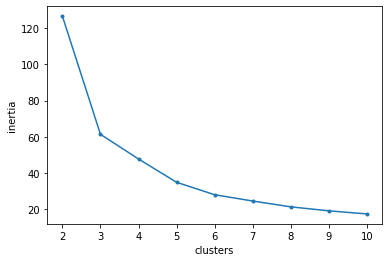

In [5]:
# elbow plot
# create empty list for inertias
inertias = []

# loop through k values between 2 - 10 and store the inertias in the list
for k in range(2, 11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(scaled_df)
  inertias.append(kmeans.inertia_)

# visualize scores
plt.plot(range(2, 11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia');

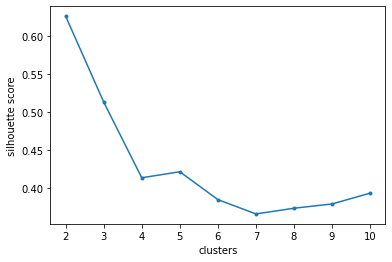

In [6]:
# silhouette score plot
# create empty list for silhouette scores
silhouette_scores = []

# loop through k values between 2 - 10 and store the scores in the list
for sil in range(2, 11):
  kmeans = KMeans(n_clusters = sil)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('clusters')
plt.ylabel('silhouette score');

best inertia is 3

while best scores seem to be 2 n_cluster for silhouette score

In [7]:
# fit the kmeans model with 2 n_clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

0.6256358724826118

In [8]:
# fit 2 different KMeans models, with the best inertia and silhouette score
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)

# fit the dataset
kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)

KMeans(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


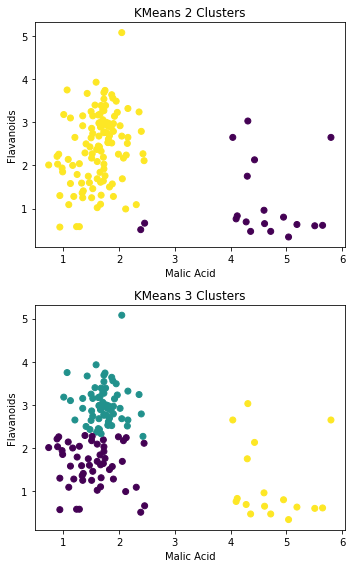

In [12]:
# Save the cluster lables to the dataframe 
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans3.labels_

# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster2'])
axes[0].set_xlabel('Malic Acid')
axes[0].set_ylabel('Flavanoids')
axes[0].set_title('KMeans 2 Clusters');

axes[1].scatter(df['malic_acid'], df['flavanoids'], c = df['cluster3'])
axes[1].set_xlabel('Malic Acid')
axes[1].set_ylabel('Flavanoids')
axes[1].set_title('KMeans 3 Clusters');
plt.tight_layout();